In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [2]:
import pandas as pd 
df = pd.read_csv("crime rate analysis.csv")

In [3]:
df.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Year,Updated On
0,12014684,03/17/2020 09:30:00 PM,0820,THEFT,$500 AND UNDER,STREET,False,False,2020,03/25/2020 03:45:43 PM
1,11864018,09/24/2019 08:00:00 AM,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,2019,10/20/2019 03:56:02 PM
2,11859805,10/13/2019 08:30:00 PM,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,2019,10/20/2019 04:03:03 PM
3,12012127,03/18/2020 02:03:00 AM,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,2020,03/25/2020 03:47:29 PM
4,11863808,10/05/2019 06:30:00 PM,0810,THEFT,OVER $500,RESIDENCE,False,False,2019,10/20/2019 03:56:02 PM


In [4]:
from pandas_profiling import ProfileReport

In [5]:
import sys
!conda install --yes --prefix {sys.prefix} pandas-profiling


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [6]:
prof=ProfileReport(df)

In [7]:
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

C:\Users\rishita\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.dropna()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Year,Updated On
0,12014684,03/17/2020 09:30:00 PM,0820,THEFT,$500 AND UNDER,STREET,False,False,2020,03/25/2020 03:45:43 PM
1,11864018,09/24/2019 08:00:00 AM,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,2019,10/20/2019 03:56:02 PM
2,11859805,10/13/2019 08:30:00 PM,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,2019,10/20/2019 04:03:03 PM
3,12012127,03/18/2020 02:03:00 AM,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,2020,03/25/2020 03:47:29 PM
4,11863808,10/05/2019 06:30:00 PM,0810,THEFT,OVER $500,RESIDENCE,False,False,2019,10/20/2019 03:56:02 PM
...,...,...,...,...,...,...,...,...,...,...
477772,12275971,01/14/2021 09:00:00 AM,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,2021,01/23/2021 03:54:52 PM
477773,12275660,02/01/2019 07:00:00 AM,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,2019,01/23/2021 03:54:52 PM
477774,12271896,01/16/2021 01:00:00 PM,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2021,01/23/2021 03:54:52 PM
477775,12271349,01/16/2021 09:13:00 PM,0325,ROBBERY,VEHICULAR HIJACKING,ALLEY,False,False,2021,01/23/2021 03:54:52 PM


In [10]:
import chardet 
with open("crime rate analysis.csv",'rb') as rawdata:  result = chardet.detect(rawdata.read(10000))  # check what the character encoding might be  
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [11]:
import chardet 
with open("crime rate analysis.csv",'rb') as rawdata:  result = chardet.detect(rawdata.read(10000))  # check what the character encoding might be  
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [12]:
df.shape

(477777, 10)

In [13]:
import datetime
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Hour"]=df["Date"].dt.hour

In [14]:
df.drop(["Date","ID","Description"], axis=1, inplace=True)

In [15]:
df["Primary Type"].value_counts()

THEFT                                104630
BATTERY                               92325
CRIMINAL DAMAGE                       52444
ASSAULT                               39525
DECEPTIVE PRACTICE                    36426
OTHER OFFENSE                         29623
NARCOTICS                             22581
MOTOR VEHICLE THEFT                   19312
BURGLARY                              18602
ROBBERY                               16236
WEAPONS VIOLATION                     15185
CRIMINAL TRESPASS                     11130
OFFENSE INVOLVING CHILDREN             4266
PUBLIC PEACE VIOLATION                 2815
SEX OFFENSE                            2261
INTERFERENCE WITH PUBLIC OFFICER       2224
CRIMINAL SEXUAL ASSAULT                1773
HOMICIDE                               1317
CRIM SEXUAL ASSAULT                    1023
ARSON                                   969
PROSTITUTION                            959
STALKING                                440
LIQUOR LAW VIOLATION            

In [16]:
def decompose(x):
    if x=="THEFT":
        return "THEFT"
    elif x=="BATTERY":
        return "BATTERY"
    elif x=="CRIMINAL DAMAGE":
        return "CRIMINAL DAMAGE"
    elif x=="ASSAULT":
        return "ASSAULT"
    else:
        return "OTHERS"

In [17]:
df["Primary Type"]=df["Primary Type"].apply(decompose)


In [18]:
df.drop("Updated On", axis=1, inplace=True)

In [19]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
x=be.fit_transform(df["Primary Type"])

C:\Users\rishita\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [20]:
x

,Primary Type_0,Primary Type_1,Primary Type_2,Primary Type_3
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,1,1
4,0,0,0,1
...,...,...,...,...
477772,0,0,1,0
477773,0,0,1,1
477774,0,0,1,1
477775,0,0,1,1


In [21]:
df=pd.concat([df,x], axis=1)

In [22]:
df.drop("Primary Type", axis=1, inplace= True)

In [23]:
df

,IUCR,Location Description,Arrest,Domestic,Year,Month,Day,Hour,Primary Type_0,Primary Type_1,Primary Type_2,Primary Type_3
0,0820,STREET,False,False,2020,3,17,21,0,0,0,1
1,1154,COMMERCIAL / BUSINESS OFFICE,False,False,2019,9,24,8,0,0,1,0
2,0860,GROCERY FOOD STORE,False,False,2019,10,13,20,0,0,0,1
3,0910,APARTMENT,False,True,2020,3,18,2,0,0,1,1
4,0810,RESIDENCE,False,False,2019,10,5,18,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
477772,1154,RESIDENCE,False,False,2021,1,14,9,0,0,1,0
477773,2825,COMMERCIAL / BUSINESS OFFICE,False,False,2019,2,1,7,0,0,1,1
477774,0620,APARTMENT,False,False,2021,1,16,13,0,0,1,1
477775,0325,ALLEY,False,False,2021,1,16,21,0,0,1,1


In [24]:
import category_encoders as ce
a=ce.BaseNEncoder(cols="Location Description", base=4)
x=a.fit_transform(df["Location Description"])


C:\Users\rishita\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [25]:
x

,Location Description_0,Location Description_1,Location Description_2,Location Description_3,Location Description_4
0,0,0,0,0,1
1,0,0,0,0,2
2,0,0,0,0,3
3,0,0,0,1,0
4,0,0,0,1,1
...,...,...,...,...,...
477772,0,0,0,1,1
477773,0,0,0,0,2
477774,0,0,0,1,0
477775,0,0,1,0,3


In [26]:
df=pd.concat([df,x], axis=1)


In [27]:
df.drop("Location Description", axis=1, inplace=True)


In [28]:
df.head()

,IUCR,Arrest,Domestic,Year,Month,Day,Hour,Primary Type_0,Primary Type_1,Primary Type_2,Primary Type_3,Location Description_0,Location Description_1,Location Description_2,Location Description_3,Location Description_4
0,0820,False,False,2020,3,17,21,0,0,0,1,0,0,0,0,1
1,1154,False,False,2019,9,24,8,0,0,1,0,0,0,0,0,2
2,0860,False,False,2019,10,13,20,0,0,0,1,0,0,0,0,3
3,0910,False,True,2020,3,18,2,0,0,1,1,0,0,0,1,0
4,0810,False,False,2019,10,5,18,0,0,0,1,0,0,0,1,1


In [29]:
def Domestic(x):
    if x==True:
        return 1
    else:
        return 0

In [30]:
df["Domestic"]=df["Domestic"].apply(Domestic)


In [31]:
df.drop("IUCR",axis=1, inplace=True)

In [32]:
x=df.iloc[:,1:]
y=df["Arrest"]

In [33]:
x

,Domestic,Year,Month,Day,Hour,Primary Type_0,Primary Type_1,Primary Type_2,Primary Type_3,Location Description_0,Location Description_1,Location Description_2,Location Description_3,Location Description_4
0,0,2020,3,17,21,0,0,0,1,0,0,0,0,1
1,0,2019,9,24,8,0,0,1,0,0,0,0,0,2
2,0,2019,10,13,20,0,0,0,1,0,0,0,0,3
3,1,2020,3,18,2,0,0,1,1,0,0,0,1,0
4,0,2019,10,5,18,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477772,0,2021,1,14,9,0,0,1,0,0,0,0,1,1
477773,0,2019,2,1,7,0,0,1,1,0,0,0,0,2
477774,0,2021,1,16,13,0,0,1,1,0,0,0,1,0
477775,0,2021,1,16,21,0,0,1,1,0,0,1,0,3


In [34]:
y

0         False
1         False
2         False
3         False
4         False
          ...  
477772    False
477773    False
477774    False
477775    False
477776     True
Name: Arrest, Length: 477777, dtype: bool

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[97005,    32],
       [22369,    39]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

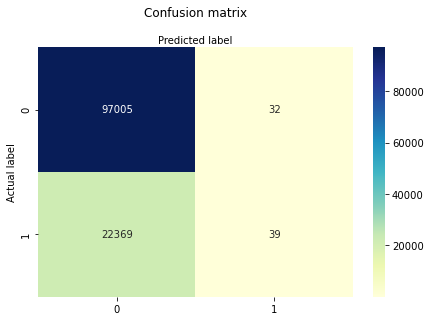

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8124576164762024
Precision: 0.5492957746478874
Recall: 0.0017404498393430918


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8103980911716689
Precision: 0.4926655618977475
Recall: 0.3582202784719743


Text(0.5, 257.44, 'Predicted label')

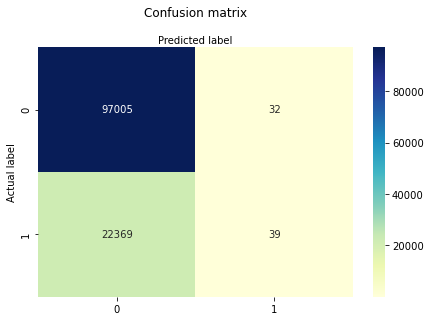

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8191720038511449
Precision: 0.5262884252940794
Recall: 0.36138878971795785


Text(0.5, 257.44, 'Predicted label')

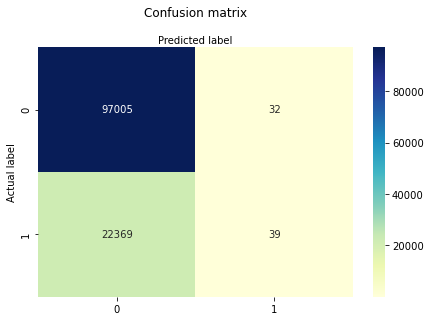

In [81]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')